# Problem Statement

A drug is generally administered to a patient in certain patterns or in regular
intervals of time. For example Chemotherapy which is drug treatment in case of Cancer is
generally given to patients in an interval 3-4 weeks, i.e. every 3-4 weeks patients are
administered with the drug.

Similarly to Chemotherapy, “Target Drug” is also administered/prescribed in certain patterns,
we want to analyse in what patterns “Target Drug“ is administered/prescribed to patients,
there might be multiple patterns in which “Target Drug” is administered/prescribed, come up
with an analysis which to extract the dominant patterns in the data using clustering or other
unsupervised techniques.
Visualise the prescription patterns with time on X-axis (month) and prescriptions on Y-axis
for each of the patterns you are able to extract(Below is an example of a prescription pattern,
where a prescription is made at least once in the first two months followed by one
prescription for every two months).

# Import Needed Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Load the File

In [2]:
df = pd.read_parquet('train.parquet')
df.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [3]:
# Pick the patients took target_drug and store it in td_df
td_df = df[df['Incident'] == 'TARGET DRUG']
td_df.head()

,Patient-Uid,Date,Incident
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG


In [4]:
td_df['month'] = td_df['Date'].dt.to_period('M')
td_df

,Patient-Uid,Date,Incident,month
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG,2020-04
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG,2018-06
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG,2019-06
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG,2019-11
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG,2020-03
...,...,...,...,...
29074998,a0ef2b6d-1c7c-11ec-9172-16262ee38c7f,2018-10-12,TARGET DRUG,2018-10
29075105,a0ebe423-1c7c-11ec-a5e0-16262ee38c7f,2019-07-02,TARGET DRUG,2019-07
29075494,a0ebc713-1c7c-11ec-bd53-16262ee38c7f,2019-05-21,TARGET DRUG,2019-05
29080031,a0ee1bdb-1c7c-11ec-90ba-16262ee38c7f,2018-06-07,TARGET DRUG,2018-06


# Unique Months Of Patients

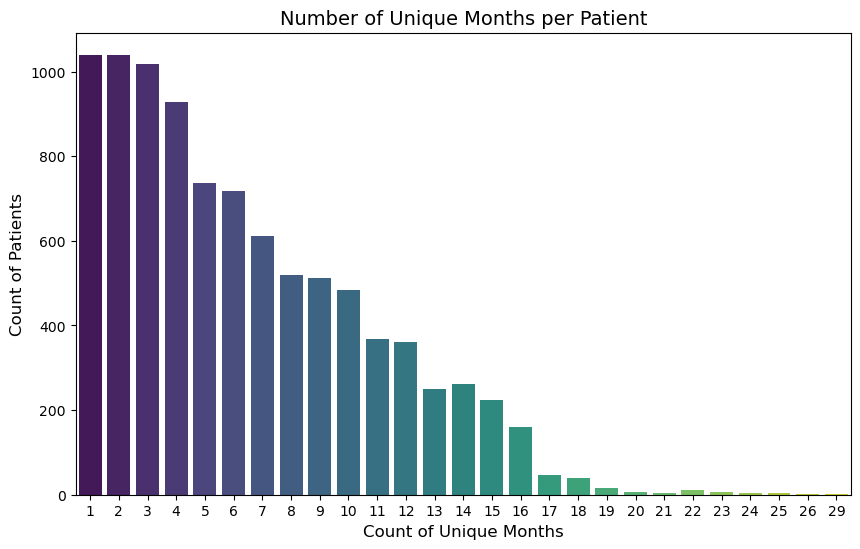

In [5]:
# Assuming unique_patients is the DataFrame obtained from the provided code
unique_patients = td_df.groupby('Patient-Uid')['month'].nunique().reset_index()

# Create count plot using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=unique_patients, x='month', palette='viridis')
plt.xlabel('Count of Unique Months', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)
plt.title('Number of Unique Months per Patient', fontsize=14)
plt.show()
